In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv(r'E:\Data Analysis\regression-project\notebooks\data\Algerian_forest_fires_dataset_CLEANED.csv')

In [5]:
df.drop(['month','day','year'],inplace=True,axis=1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [25]:
X=df.drop('FWI',axis=1)
y=df['FWI']
X.shape,y.shape

((243, 11), (243,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


## Feature Selection 

multicolinairity : which means in independent  columns correlation value is high then it's called multicolinarity

so we remove one of this columns for better accuracy because one of both is enough for predict O/P

<Axes: >

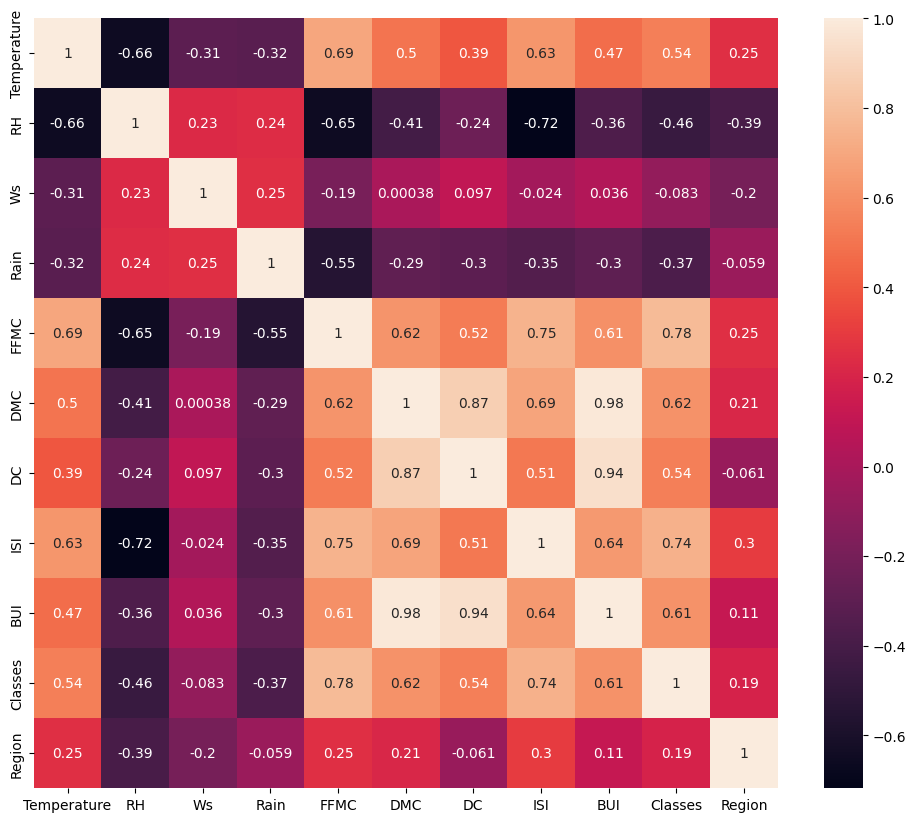

In [12]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

In [30]:
def correlation(dataset,threshold):
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [35]:
corr_features=correlation(X_train,0.85)

In [36]:
corr_features

{'BUI', 'DC'}

In [37]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [18]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

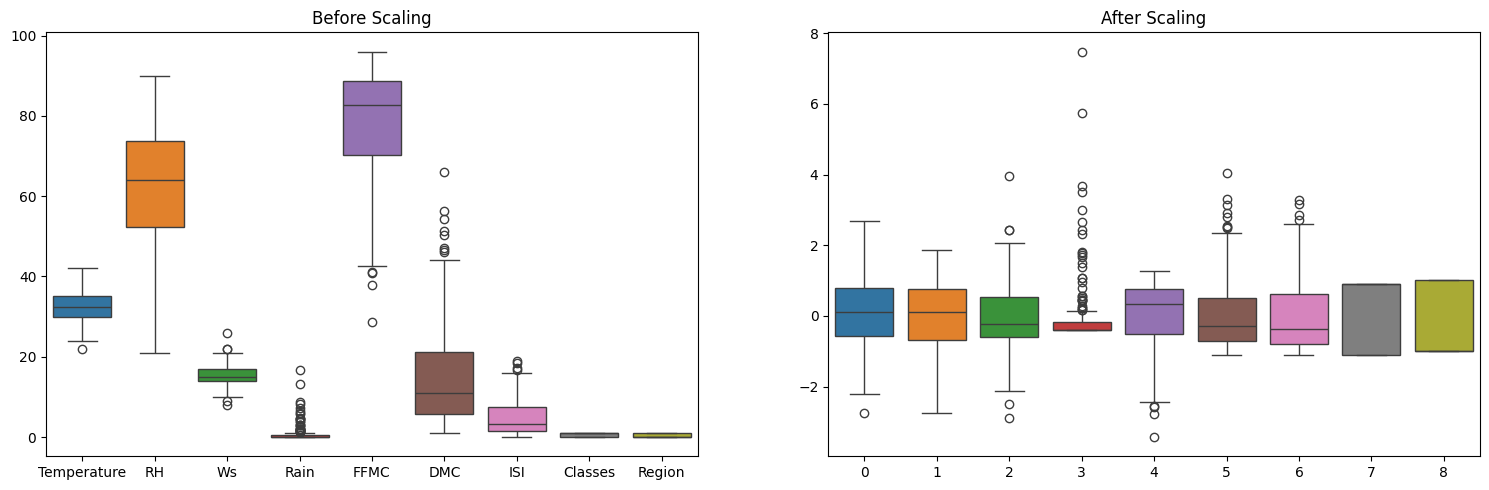

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before scaling boxplot
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Before Scaling")

# After scaling boxplot
sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("After Scaling")


plt.tight_layout()
fig.subplots_adjust(wspace=0.2)   # increase horizontal space

plt.show()


### here we can see that after scaling data we can see outliear in dataset easily by box plot

## 1. Linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linear_regression=LinearRegression()
linear_regression.fit(X_train_scaled,y_train)
y_pred=linear_regression.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)


Mean Absolute Error: 0.546823646524997
R2 Score: 0.9847657384266951


## 2. Lasso Regression model(L1 regularization)

In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)

Mean Absolute Error: 1.1331759949144087
R2 Score: 0.9492020263112388


## 3. Ridge Regression model(L2 regularization)

In [22]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train_scaled,y_train)
y_pred=ridge_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)

Mean Absolute Error: 0.5642305340105691
R2 Score: 0.9842993364555513


## 4. ElasticNet regression model

In [23]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)   
print("R2 Score:",score)    

Mean Absolute Error: 1.8822353634895996
R2 Score: 0.8753460589519704


In [24]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge_reg, open('ridge_model.pkl', 'wb'))